# Regresja liniowa z regularyzacją

In [148]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
from pandas import Series
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### 0. Znalezienie danych
Liczba dostępnych w Internecie zbiorów danych jest ogromna. 
Ostatecznie zdecydowałem się wykorzystać dane z linkowanego Kaggle'a, tj. https://www.kaggle.com/apapiu/regularized-linear-models/data

(disclaimer: świetna strona, multum danych - https://archive.ics.uci.edu/ml/datasets.html)

_Będę analizował dane dotyczące cen mieszkań._

#### 1. Ładowanie danych

In [149]:
data = pd.read_csv('house_prices_kaggle.csv', index_col = 0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data fields
Here's a brief version of what you'll find in the data description file.

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

In [150]:
data.shape

(1460, 80)

Załadowaliśmy dane. Składają się one z 1460 rekordów. Mamy 80 kolumn (parametrów).

#### 2. Wstępne opisanie danych i brakujące wartości

In [151]:
data.describe(include = 'all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Przeanalizujmy braki w wartościach.

In [152]:
def analyze_null(df):
    nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
    nulls.columns = ['Null Count']
    nulls.index.name = 'Feature'
    return nulls[nulls['Null Count'] > 0]

In [153]:
analyze_null(data)

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageCond,81
GarageFinish,81


Spróbujmy obliczyć wiek nieruchomości.

Tak wyglądają dane mówiące o roku budowy/sprzedaży.

In [154]:
data[['YrSold','YearBuilt']].head()

,YrSold,YearBuilt
Id,,
1,2008,2003
2,2007,1976
3,2008,2001
4,2006,1915
5,2008,2000


Sprawdźmy, czy mamy jakieś brakujące wartości:

In [155]:
display(data['YearBuilt'].isna().describe())
display(data['YrSold'].isna().describe())

count      1460
unique        1
top       False
freq       1460
Name: YearBuilt, dtype: object

count      1460
unique        1
top       False
freq       1460
Name: YrSold, dtype: object

Brak jest brakujących wartości. Możemy zatem obliczyć wiek nieruchomości.

In [156]:
data['Age'] = data['YrSold'] - data['YearBuilt']
data['Age'].head()

Id
1     5
2    31
3     7
4    91
5     8
Name: Age, dtype: int64

Liczymy korelację i obrazujemy ją:

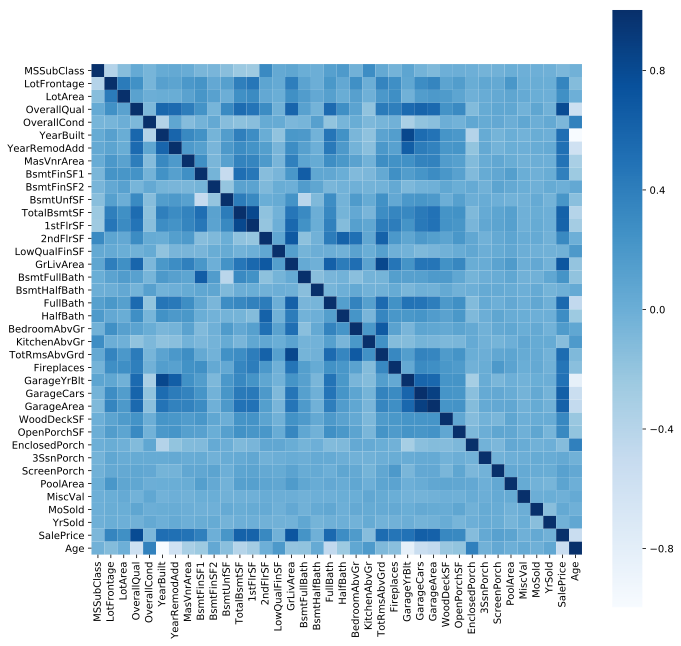

In [157]:
correlation = data.corr()
fig = plt.subplots(figsize=(11,11))
sns.heatmap(correlation,vmax=1,square=True,cmap='Blues')

Mamy ogólny pogląd na korelację pomiędzy cechami.

Zobaczmy jak w szczegółach wygląda korelacja `SalePrice` z innymi cechami:

In [158]:
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Age             -0.523350
Name: SalePr

Widzimy, że wiek ma ujemną korelację z `SalePrice`. Nie widać między nimi zależności.

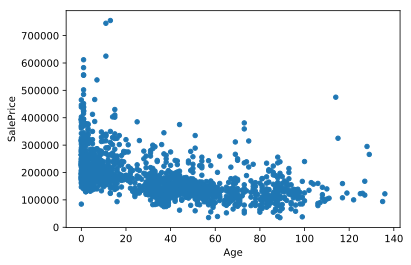

In [159]:
data.plot(kind = 'scatter', x = 'Age', y = 'SalePrice')

#### 3. Rysowanie wykresów

In [160]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Zbadajmy "skośność" rozkładu `SalePrice` (skew).

Skew: 1.8828757597682129


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

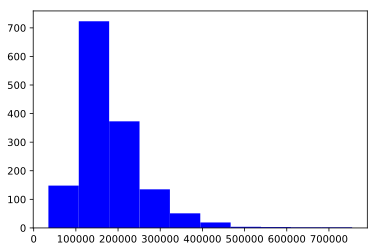

In [161]:
print ("Skew:", data['SalePrice'].skew())
plt.hist(data['SalePrice'], color='blue')

Skew: 0.12133506220520406


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

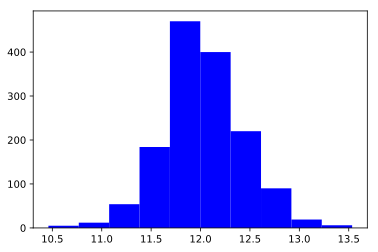

In [162]:
target = np.log(data['SalePrice'])
print ("Skew:", target.skew())
plt.hist(target, color='blue')

Po zlogarytmowaniu rozkład wartości tej cechy przypomina rozkład normalny.
Dodajmy zmodyfikowaną kolumnę do naszych danych.

In [163]:
data['SalePriceLog'] = target

Cecha `OverallQual` ma dużą korelację z `SalePrice`.
Zobaczmy, jak wyglądają jej wartości.

Text(0.5,0,'Sale Price')

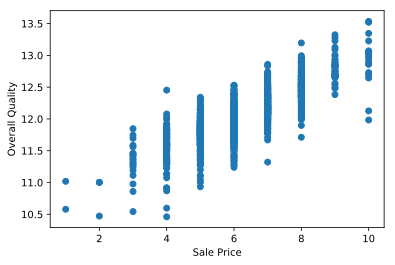

In [164]:
plt.scatter(x=data['OverallQual'], y=target)
plt.ylabel('Overall Quality')
plt.xlabel('Sale Price')

In [165]:
data['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [166]:
quality_pivot = data.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

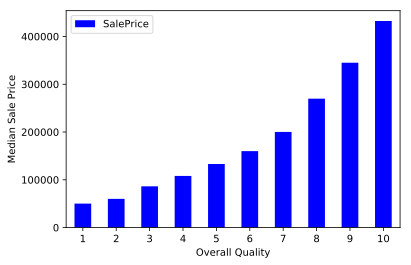

In [167]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

Widzimy, że wraz ze wzrostem wartości tej cechy, wzrasta też mediana ceny sprzedaży.

Wybierzmy jeszcze 3 cechy:
- `GarageArea`
- `LotArea`
- `GrLivArea`

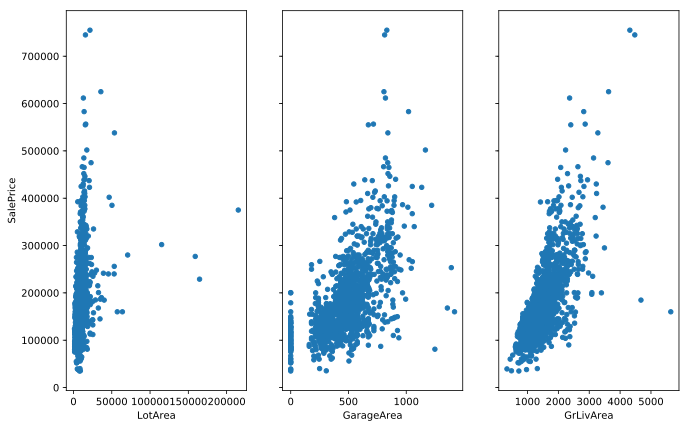

In [168]:
fig, axs = plt.subplots(1, 3, sharey = True)
data.plot(kind = 'scatter', x = 'LotArea', y = 'SalePrice', ax = axs[0], figsize=(11, 7))
data.plot(kind = 'scatter', x = 'GarageArea', y = 'SalePrice', ax = axs[1])
data.plot(kind = 'scatter', x = 'GrLivArea', y = 'SalePrice', ax = axs[2])

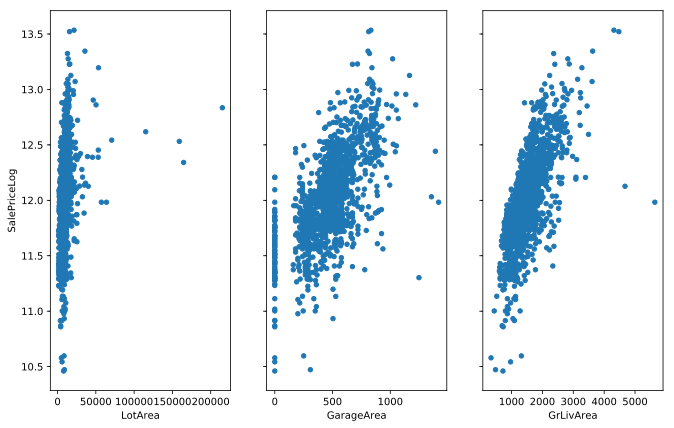

In [169]:
fig, axs = plt.subplots(1, 3, sharey = True)
data.plot(kind = 'scatter', x = 'LotArea', y = 'SalePriceLog', ax = axs[0], figsize=(11, 7))
data.plot(kind = 'scatter', x = 'GarageArea', y = 'SalePriceLog', ax = axs[1])
data.plot(kind = 'scatter', x = 'GrLivArea', y = 'SalePriceLog', ax = axs[2])

In [170]:
data = data[(data.GrLivArea < 3500) & (data.LotArea < 50000) & (data.GarageArea < 1250)]

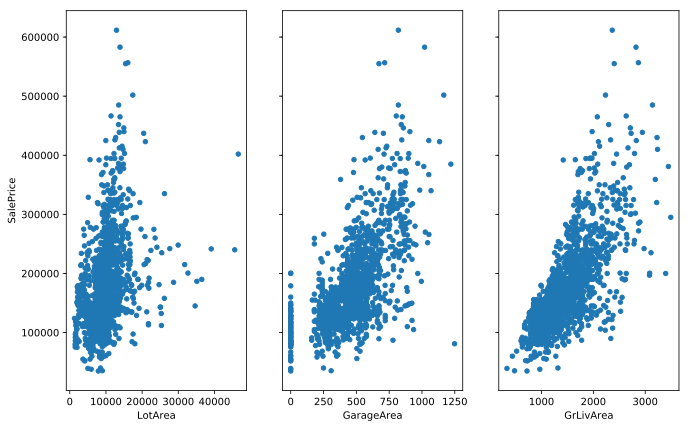

In [171]:
fig, axs = plt.subplots(1, 3, sharey = True)
data.plot(kind = 'scatter', x = 'LotArea', y = 'SalePrice', ax = axs[0], figsize=(11, 7))
data.plot(kind = 'scatter', x = 'GarageArea', y = 'SalePrice', ax = axs[1])
data.plot(kind = 'scatter', x = 'GrLivArea', y = 'SalePrice', ax = axs[2])

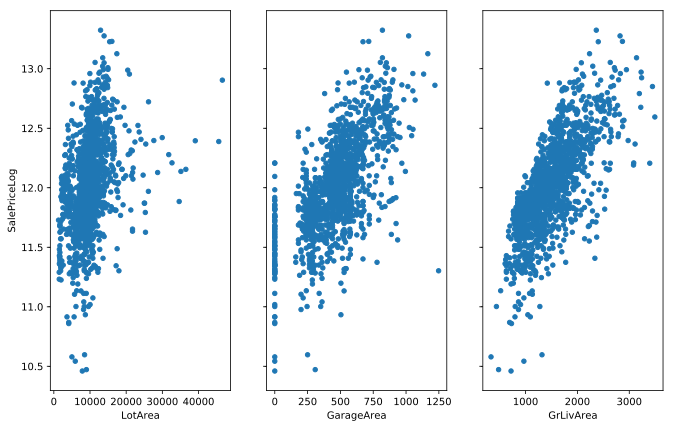

In [172]:
fig, axs = plt.subplots(1, 3, sharey = True)
data.plot(kind = 'scatter', x = 'LotArea', y = 'SalePriceLog', ax = axs[0], figsize=(11, 7))
data.plot(kind = 'scatter', x = 'GarageArea', y = 'SalePriceLog', ax = axs[1])
data.plot(kind = 'scatter', x = 'GrLivArea', y = 'SalePriceLog', ax = axs[2])

#### 4. Przetwarzanie danych

Spójżmy na nieliczbowe wartości.

In [173]:
categoricals = data.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1442,1442,91,1442,1442,1442,1442,1442,1442,1442,...,1361,1361,1361,1361,1442,5,279,52,1442,1442
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1134,1437,50,923,1306,1441,1044,1374,225,1246,...,857,601,1294,1308,1323,2,156,47,1252,1184


In [174]:
for c in categoricals.columns:
    print(c)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


Zajmijmy się `SaleCondition`.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

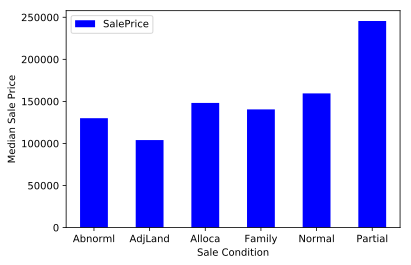

In [175]:
condition_pivot = data.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

Dla `Partial`, wartość ceny jest znacząco wyższa niż dla innych wartości.

In [176]:
def sc_encode(x): return 1 if x == 'Partial' else 0
data['SaleConditionEnc'] = data.SaleCondition.apply(sc_encode)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

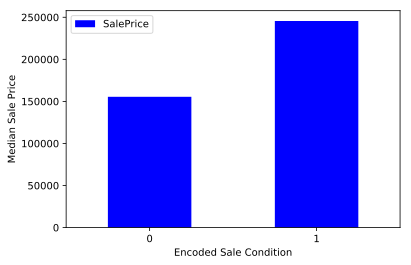

In [177]:
condition_pivot = data.pivot_table(index='SaleConditionEnc', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

Text(0.5,0,'Sale Price')

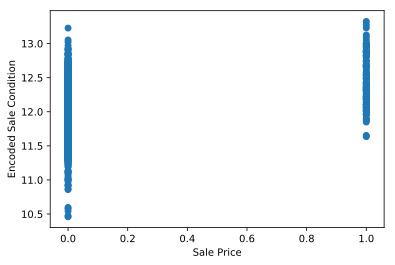

In [183]:
plt.scatter(x=data['SaleConditionEnc'], y=data['SalePriceLog'])
plt.ylabel('Encoded Sale Condition')
plt.xlabel('Sale Price')

W tym momencie nie potrzebne są nam już wartości, inne niż liczbowe.
Możemy się ich pozbyć, jak jak kolumn, które zawierają wartości n/a.

Wybierzmy w ogóle tylko te cechy, które chcemy brać pod uwagę.

In [186]:
df = data.select_dtypes(include=[np.number]).interpolate().dropna()
df = df[['LotArea', 'GarageArea', 'GrLivArea', 'SaleConditionEnc', 'SalePriceLog']]
df.head()

,LotArea,GarageArea,GrLivArea,SaleConditionEnc,SalePriceLog
Id,,,,,
1,8450,548,1710,0,12.247694
2,9600,460,1262,0,12.109011
3,11250,608,1786,0,12.317167
4,9550,642,1717,0,11.849398
5,14260,836,2198,0,12.429216


Upewnijmy się, że nigdzie nie mamy n/a.

In [188]:
sum(df.isnull().sum() != 0)

0

### 5. Trenowanie modeli

In [189]:
params = ['LotArea', 'GarageArea', 'GrLivArea', 'SaleConditionEnc']
price = ['SalePriceLog']

# training set
X  = df[params][:1300]
Y  = df[price][:1300]

# test set
Xt = df[params][1301:]
Yt = df[price][1301:]

#### Zwykła regresja liniowa

In [190]:
lin = linear_model.LinearRegression()
lin.fit(X, Y)
P = lin.predict(Xt)

print("Współczynniki: ", lin.coef_)
print("Śr. bł. kw. dla testowego zbioru: %.5f" % metrics.mean_squared_error(Yt, P))

Współczynniki:  [[5.89209724e-06 6.94660045e-04 3.99492215e-04 2.23279014e-01]]
Śr. bł. kw. dla testowego zbioru: 0.05700


#### Regresja z regularyzacją L1 (Lasso)

In [191]:
lasso = linear_model.Lasso(alpha = 1)
lasso.fit(X, Y)

P = lasso.predict(Xt)

print("Współczynniki: ", lasso.coef_)
print("Śr. bł. kw. dla testowego zbioru: %.5f" % metrics.mean_squared_error(Yt, P))

Współczynniki:  [5.70485034e-06 7.54200479e-04 4.05390847e-04 0.00000000e+00]
Śr. bł. kw. dla testowego zbioru: 0.05866


Text(0,0.5,'Śr. bł. kw.')

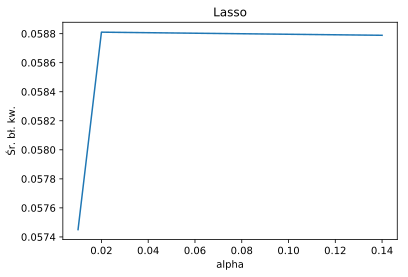

In [192]:
alphas = [x * 0.01 for x in range(1, 15)]
lassos = [metrics.mean_squared_error(linear_model.Lasso(alpha = a).fit(X, Y).predict(Xt), Yt) for a in alphas]
lassos = Series(lassos, index = alphas)
lassos.plot(title = "Lasso")
plt.xlabel("alpha")
plt.ylabel("Śr. bł. kw.")

#### Regresja z regularyzacją L2 (Ridge)

In [193]:
ridge = linear_model.Ridge(alpha = 1)
ridge.fit(X, Y)
P = ridge.predict(Xt)

print("Współczynniki Ridge: ", ridge.coef_)
print("Śr. bł. kw. dla testowego zbioru: %.5f" % metrics.mean_squared_error(Yt, P))

Współczynniki Ridge:  [[5.88702071e-06 6.95548435e-04 3.99560467e-04 2.20915120e-01]]
Śr. bł. kw. dla testowego zbioru: 0.05699


Text(0,0.5,'Śr. bł. kw.')

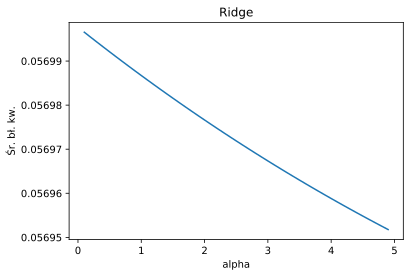

In [194]:
alphas = [x * 0.1 for x in range(1, 50)]
ridges = [metrics.mean_squared_error(linear_model.Ridge(alpha = a).fit(X, Y).predict(Xt), Yt) for a in alphas]
ridges = Series(ridges, index = alphas)
ridges.plot(title = "Ridge")
plt.xlabel("alpha")
plt.ylabel("Śr. bł. kw.")

In [195]:
ridge = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv = 3)
ridge.fit(X, Y)
P = ridge.predict(Xt)

print("Współczynniki: ", ridge.coef_)
print("Śr. bł. kw. dla testowego zbioru: %.5f" % metrics.mean_squared_error(Yt, P))

Współczynniki:  [[5.88702071e-06 6.95548435e-04 3.99560467e-04 2.20915120e-01]]
Śr. bł. kw. dla testowego zbioru: 0.05699


#### Regresja z regularyzacją ElasticNet

In [198]:
enet = linear_model.ElasticNet(alpha = 1, l1_ratio = 0.5)
enet.fit(X, Y)
P = enet.predict(Xt)

print("Współczynniki: ", enet.coef_)
print("Śr. bł. kw. dla testowego zbioru: %.5f" % metrics.mean_squared_error(Yt, P))

Współczynniki:  [5.55874808e-06 7.66369358e-04 4.05667229e-04 0.00000000e+00]
Śr. bł. kw. dla testowego zbioru: 0.05873


Text(0,0.5,'Śr. bł. kw.')

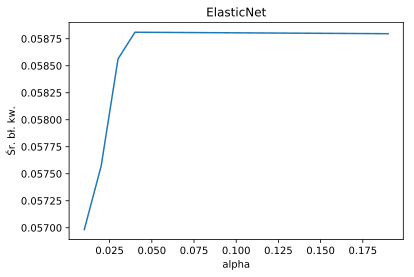

In [197]:
alphas = [x * 0.01 for x in range(1, 20)]
enets = [metrics.mean_squared_error(linear_model.ElasticNet(alpha = a, l1_ratio = 0.5).fit(X, Y).predict(Xt), Yt) for a in alphas]
enets = Series(enets, index = alphas)
enets.plot(title = "ElasticNet")
plt.xlabel("alpha")
plt.ylabel("Śr. bł. kw.")